# Optimización de modelos de clasificación

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

Con los archivos generados en la etapa de recolección de datos:

In [2]:
data = np.loadtxt("Data1.txt")
x = data[:, 1:]
y = data[:, 0]

## Seleccione dos de los modelos probados en el paso anterior que tengan hiperparámetros, e indique cuáles son dichos hiperparámetros.

1. Clasificador Random Forest. Hiperparámetro: **max_depth** (máxima profundidad del árbol)
2. 

## Seleccione al menos uno de los hiperparámetros de cada modelo, y grafique el rendimiento que se obtendría con distintos valores propuestos para cada modelo.

m óptimo:  9


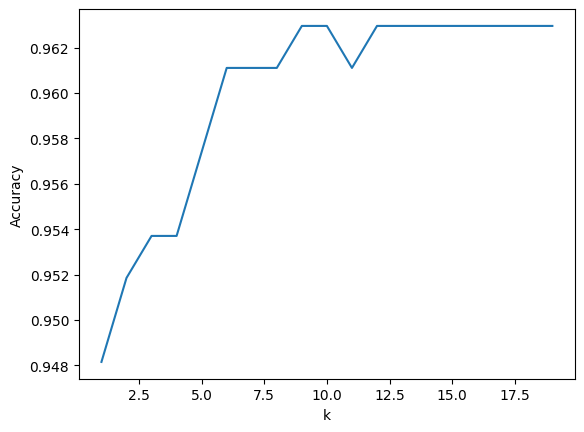

In [ ]:
mm = np.arange(1,20)

acc = []

for m in mm:
    
    acc_cv = []

    sss = StratifiedShuffleSplit(
        n_splits=5,
        train_size=0.8,
        random_state=1234
    ) 

    for train_index, test_index in sss.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = RandomForestClassifier(max_depth=m, random_state=1234)           

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = mm[opt_index]
opt_acc = acc[opt_index]

print("m óptimo: ", opt_hyperparameter)
print("Its accuracy: ", opt_acc)
plt.plot(mm, acc)
plt.xlabel("m")
plt.ylabel("Accuracy")

plt.show()

## Para los mismos modelos de clasificación, aplique algún método de selección de características, e indique cuáles son las características seleccionadas. ¿Es posible reducir el número de características sin perder rendimiento en su modelo?

Optimal number of features:  81
Its accuracy:  0.9722222222222223


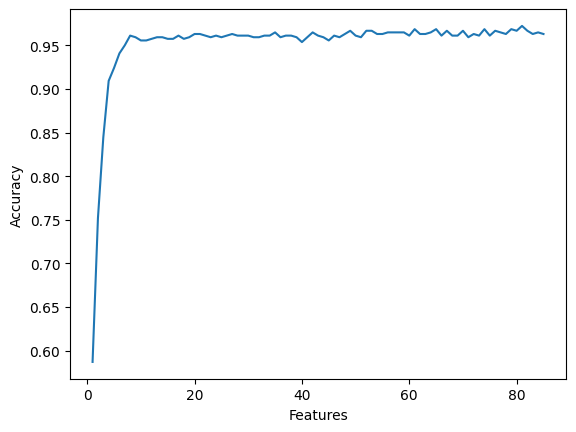

Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x22' 'x23' 'x24' 'x25'
 'x26' 'x27' 'x28' 'x29' 'x30' 'x31' 'x32' 'x33' 'x34' 'x35' 'x36' 'x37'
 'x38' 'x39' 'x40' 'x41' 'x42' 'x43' 'x44' 'x45' 'x46' 'x47' 'x48' 'x49'
 'x50' 'x51' 'x52' 'x53' 'x54' 'x55' 'x56' 'x57' 'x58' 'x59' 'x60' 'x61'
 'x62' 'x63' 'x64' 'x65' 'x66' 'x67' 'x68' 'x69' 'x70' 'x71' 'x72' 'x73'
 'x74' 'x75' 'x76' 'x77' 'x78' 'x79' 'x80' 'x81' 'x82' 'x83' 'x84']


In [11]:
#The goal of recursive feature elimination (RFE) is to select features 
#by recursively considering smaller and smaller sets of features.
n_feats = np.arange(1,86)

acc_nfeat = []

for n_feat in n_feats:
    
    acc_cv = []

    sss = StratifiedShuffleSplit(
        n_splits=5,
        train_size=0.8,
        random_state=1234
    ) 

    for train_index, test_index in sss.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = RandomForestClassifier(max_depth=opt_hyperparameter, random_state=1234)

        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
opt_acc = acc_nfeat[opt_index]
print("Optimal number of features: ", opt_features)
print("Its accuracy: ", opt_acc)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("Features")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = RandomForestClassifier(max_depth=opt_hyperparameter, random_state=1234)
fselection = RFE(clf, n_features_to_select=n_feat)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

#x_transformed = fselection.transform(x)
#clf.fit(x_transformed, y)

## Evalúe sus modelos de clasificación optimizando hiperparámetros y llevando a cabo selección de características con validación cruzada anidada.

In [ ]:
mm = np.arange(1,10)
acc = []

n_feats = np.arange(1,10)

#Optimización de hiperparámeros 
for m in mm:
    
    acc_hyper=[]

    #Reducción de características
    for n_feat in n_feats:
        
        acc_cv = []

        sss = StratifiedShuffleSplit(
            n_splits=5,
            train_size=0.8,
            random_state=1234
        ) 

        for train_index, test_index in sss.split(x, y):
        
            # Training phase
            x_train = x[train_index, :]
            y_train = y[train_index]     

            clf_cv = RandomForestClassifier(max_depth=m, random_state=1234)

            fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
            fselection_cv.fit(x_train, y_train)
            x_train = fselection_cv.transform(x_train)

            clf_cv.fit(x_train, y_train)

            # Test phase
            x_test = fselection_cv.transform(x[test_index, :])
            y_test = y[test_index]
            y_pred = clf_cv.predict(x_test)

            acc_i = accuracy_score(y_test, y_pred)
            acc_cv.append(acc_i)    

        acc_feats = np.average(acc_cv)
        acc_hyper.append(acc_feats)
    
    acc.append(acc_hyper)

opt_acc=[]
opt_indexes=[]
for item in acc:
    item=np.array(item)
    opt_indexes.append(np.argmax(item))
    opt_acc.append(np.max(item))
opt_hype_index=np.argmax(opt_acc)
opt_feat_index=opt_indexes[opt_hype_index]

opt_features = n_feats[opt_feat_index]
opt_hyperparameter = mm[opt_hype_index]
opt_acc = opt_acc[opt_hype_index]
print("Optimal number of hyperparameters: ", opt_hyperparameter)
print("Optimal number of features: ", opt_features)
print("Its accuracy: ", opt_acc)

"""plt.plot(n_feats, acc_nfeat)
plt.xlabel("Features")
plt.ylabel("Accuracy")

plt.show()"""

# Fit model with optimal number of features
clf = RandomForestClassifier(max_depth=opt_hyperparameter, random_state=1234)
fselection = RFE(clf, n_features_to_select=n_feat)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

#x_transformed = fselection.transform(x)
#clf.fit(x_transformed, y)

Optimal number of hyperparameters:  9
Optimal number of features:  8
Its accuracy:  0.961111111111111
Selected features:  ['x6' 'x7' 'x8' 'x9' 'x14' 'x43' 'x56' 'x61' 'x84']


In [6]:
clf = RandomForestClassifier(max_depth=opt_hyperparameter, random_state=1234)
fselection = RFE(clf, n_features_to_select=opt_features)
fselection.fit(x, y)

print("Selected features: ", fselection.get_feature_names_out())

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

Selected features:  ['x6' 'x7' 'x8' 'x9' 'x43' 'x56' 'x61' 'x84']


RandomForestClassifier(max_depth=np.int64(9), random_state=1234)